In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import requests

sns.set()

In [145]:
'''
there's something not quite right in the data : the total sum for 2020 day based vs the calculated age group
week based sum for 53 weeks (eliminating the 3 days of week 53 in Jan 2021) does not fully match: the week based
data have, after eliminating the 3 days of 2021, 97277 deaths, while the day based data sums to 97164
so there's an unexplained diff of 113 deaths.
'''

97277 - 97164


113

In [98]:
pop_url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101A/FolkmangdNov'

pop_json_query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:RegionRiket99",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:Ålder1årA",
        "values": [
          "0",
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26",
          "27",
          "28",
          "29",
          "30",
          "31",
          "32",
          "33",
          "34",
          "35",
          "36",
          "37",
          "38",
          "39",
          "40",
          "41",
          "42",
          "43",
          "44",
          "45",
          "46",
          "47",
          "48",
          "49",
          "50",
          "51",
          "52",
          "53",
          "54",
          "55",
          "56",
          "57",
          "58",
          "59",
          "60",
          "61",
          "62",
          "63",
          "64",
          "65",
          "66",
          "67",
          "68",
          "69",
          "70",
          "71",
          "72",
          "73",
          "74",
          "75",
          "76",
          "77",
          "78",
          "79",
          "80",
          "81",
          "82",
          "83",
          "84",
          "85",
          "86",
          "87",
          "88",
          "89",
          "90",
          "91",
          "92",
          "93",
          "94",
          "95",
          "96",
          "97",
          "98",
          "99",
          "100+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [99]:
r_pop = requests.post(pop_url,json=pop_json_query)
r_pop.status_code

200

In [100]:
pop_json = r_pop.json()
pop_json['data'][0]

{'key': ['00', '0', '1', '2002'], 'values': ['42233']}

In [101]:
pop_df = pd.DataFrame.from_dict(pop_json['data'])
pop_df[['area','age','gender','year']] = pop_df['key'].to_list()
pop_df['pop'] = pop_df['values'].apply(lambda x :x[0]).astype(int)

age_labels = pop_df['age'].unique()

pop_df.drop(['key','values','area'],axis=1,inplace=True)
pop_df['age'] = pd.Categorical(pop_df['age'],age_labels)
pop_df = pop_df.groupby(['year','age']).sum()
pop_df


pop
year age        
2002 0     82336
     1     92580
     2     92138
     3     90251
     4     91214
...          ...
2020 96     5709
     97     3972
     98     2707
     99     1915
     100+   2715

[1919 rows x 1 columns]

In [102]:
# delete 2020 pop until we have official 2020 death data with 1 year bins

pop_df_inc_2020 = pop_df.copy()

pop_df.drop('2020',inplace=True)
pop_df

pop
year age        
2002 0     82336
     1     92580
     2     92138
     3     90251
     4     91214
...          ...
2019 96     5530
     97     3865
     98     2886
     99     1999
     100+   2380

[1818 rows x 1 columns]

In [103]:
#### DEATHS ####
dead_url = 'http://api.scb.se/OV0104/v1/doris/sv/ssd/START/BE/BE0101/BE0101I/DodaHandelseK'
dead_json_query = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:RegionRiket99",
        "values": [
          "00"
        ]
      }
    },
    {
      "code": "Alder",
      "selection": {
        "filter": "vs:Ålder1årA",
        "values": [
          "0",
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7",
          "8",
          "9",
          "10",
          "11",
          "12",
          "13",
          "14",
          "15",
          "16",
          "17",
          "18",
          "19",
          "20",
          "21",
          "22",
          "23",
          "24",
          "25",
          "26",
          "27",
          "28",
          "29",
          "30",
          "31",
          "32",
          "33",
          "34",
          "35",
          "36",
          "37",
          "38",
          "39",
          "40",
          "41",
          "42",
          "43",
          "44",
          "45",
          "46",
          "47",
          "48",
          "49",
          "50",
          "51",
          "52",
          "53",
          "54",
          "55",
          "56",
          "57",
          "58",
          "59",
          "60",
          "61",
          "62",
          "63",
          "64",
          "65",
          "66",
          "67",
          "68",
          "69",
          "70",
          "71",
          "72",
          "73",
          "74",
          "75",
          "76",
          "77",
          "78",
          "79",
          "80",
          "81",
          "82",
          "83",
          "84",
          "85",
          "86",
          "87",
          "88",
          "89",
          "90",
          "91",
          "92",
          "93",
          "94",
          "95",
          "96",
          "97",
          "98",
          "99",
          "100+"
        ]
      }
    },
    {
      "code": "Kon",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "2"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2002",
          "2003",
          "2004",
          "2005",
          "2006",
          "2007",
          "2008",
          "2009",
          "2010",
          "2011",
          "2012",
          "2013",
          "2014",
          "2015",
          "2016",
          "2017",
          "2018",
          "2019"
        ]
      }
    }
  ],
  "response": {
    "format": "json"
  }
}

In [104]:
r_dead = requests.post(dead_url,json=dead_json_query)
r_dead.status_code

200

In [105]:
dead_json = r_dead.json()['data']
dead_json[0]

{'key': ['00', '0', '1', '2002'], 'values': ['172']}

In [106]:
dead_df = pd.DataFrame.from_dict(dead_json)
dead_df[['area','age','gender','year']] = dead_df['key'].to_list()
dead_df['dead'] = dead_df['values'].apply(lambda x : x[0]).astype(int)
dead_df['age'] = pd.Categorical(dead_df['age'],age_labels)
dead_df.drop(['key','values','area'],axis=1,inplace=True)
dead_df = dead_df.groupby(['year','age']).sum()
dead_df

dead
year age       
2002 0      313
     1       24
     2       25
     3       10
     4       10
...         ...
2019 96    1551
     97    1264
     98    1019
     99     650
     100+   986

[1818 rows x 1 columns]

In [107]:
#### scb prel deaths based on week number. W53 extends to Jan 3'd 2021 ####
#### therefore this gives a bit higher death number than swe_life_expectancy.ipynb ####
#### that is based on daily death data ####

scb_file = pd.ExcelFile('https://www.scb.se/hitta-statistik/statistik-efter-amne/befolkning/befolkningens-sammansattning/befolkningsstatistik/pong/tabell-och-diagram/preliminar-statistik-over-doda/')
print (scb_file.sheet_names)
scb_prel = scb_file.parse(sheet_name='Tabell 7',skiprows=8,usecols=range(11,19))
scb_prel = scb_prel.iloc[:54]
scb_prel


['Info', 'Tabell 1', 'Tabell 2', 'Tabell 3', 'Tabell 4', 'Tabell 5', 'Tabell 6', 'Tabell 7', 'Tabell 8', 'Tabell 9a', 'Tabell 9b', 'Tabell 10', 'Tabell 11']


,M 0-64 år.1,M 65-79 år.1,M 80-89 år.1,M 90+ år.1,K 0-64 år.1,K 65-79 år.1,K 80-89 år.1,K 90+ år.1
0,108.0,275.0,304.0,150.0,79.0,256.0,310.0,341.0
1,125.0,294.0,341.0,187.0,76.0,209.0,339.0,318.0
2,106.0,288.0,327.0,175.0,69.0,230.0,328.0,305.0
3,103.0,319.0,291.0,158.0,78.0,194.0,325.0,264.0
4,111.0,293.0,336.0,174.0,68.0,242.0,308.0,315.0
5,114.0,286.0,296.0,146.0,78.0,202.0,298.0,308.0
6,96.0,282.0,339.0,175.0,83.0,227.0,322.0,301.0
7,111.0,306.0,330.0,153.0,70.0,203.0,322.0,282.0
8,109.0,293.0,309.0,160.0,78.0,221.0,309.0,299.0
9,102.0,302.0,318.0,158.0,88.0,245.0,308.0,305.0


In [108]:
scb_prel.sum().sum()

97951.0

In [109]:
scb_file.parse(sheet_name='Info',usecols=[15],skiprows=1).dropna()

,Most recently registered deaths
0,2021-01-08


In [110]:
dead_2020 = pd.DataFrame(scb_prel.iloc[:,:4].values + scb_prel.iloc[:,4:].values,
                         index=scb_prel.index,columns=['0-64','65-79','80-89','90+'])

dead_2020

,0-64,65-79,80-89,90+
0,187.0,531.0,614.0,491.0
1,201.0,503.0,680.0,505.0
2,175.0,518.0,655.0,480.0
3,181.0,513.0,616.0,422.0
4,179.0,535.0,644.0,489.0
5,192.0,488.0,594.0,454.0
6,179.0,509.0,661.0,476.0
7,181.0,509.0,652.0,435.0
8,187.0,514.0,618.0,459.0
9,190.0,547.0,626.0,463.0


In [111]:
# week 53 (idx 52) includes 3 days of jan 2021. div row 52 with 7 & mult by 3
dead_2020.loc[52] = dead_2020.loc[52] / 7 * 3
dead_2020

,0-64,65-79,80-89,90+
0,187.0,531.0,614.000000,491.000000
1,201.0,503.0,680.000000,505.000000
2,175.0,518.0,655.000000,480.000000
3,181.0,513.0,616.000000,422.000000
4,179.0,535.0,644.000000,489.000000
5,192.0,488.0,594.000000,454.000000
6,179.0,509.0,661.000000,476.000000
7,181.0,509.0,652.000000,435.000000
8,187.0,514.0,618.000000,459.000000
9,190.0,547.0,626.000000,463.000000


In [112]:
dead_2020.sum().sum()

97305.28571428571

In [113]:
# weekly_age_unknowns includes unknowns for 3 days of jan 2021, i.e 366 + 3 days inst of 366
# div by 369 & mult by 366
weekly_age_unknowns = dead_2020.loc[53]
print (weekly_age_unknowns)
print (weekly_age_unknowns.sum())
# remove 4 days 
weekly_age_unknowns -= weekly_age_unknowns / 53 / 7 * 4
print (weekly_age_unknowns)
weekly_age_unknowns.sum()
dead_2020.loc[53] = weekly_age_unknowns
dead_2020

0-64      935.0
65-79    1135.0
80-89     398.0
90+       115.0
Name: 53, dtype: float64
2583.0
0-64      924.919137
65-79    1122.762803
80-89     393.708895
90+       113.760108
Name: 53, dtype: float64


,0-64,65-79,80-89,90+
0,187.000000,531.000000,614.000000,491.000000
1,201.000000,503.000000,680.000000,505.000000
2,175.000000,518.000000,655.000000,480.000000
3,181.000000,513.000000,616.000000,422.000000
4,179.000000,535.000000,644.000000,489.000000
5,192.000000,488.000000,594.000000,454.000000
6,179.000000,509.000000,661.000000,476.000000
7,181.000000,509.000000,652.000000,435.000000
8,187.000000,514.000000,618.000000,459.000000
9,190.000000,547.000000,626.000000,463.000000


In [114]:
dead_2020.sum()

0-64     10359.919137
65-79    28569.762803
80-89    34278.280323
90+      24069.474394
dtype: float64

In [115]:
dead_2020.sum().sum()

97277.43665768193

In [116]:
daily_deaths = scb_file.parse(sheet_name='Tabell 1',skiprows=6,usecols=range(8))
daily_deaths

,DagMånad,2015,2016,2017,2018,2019,2020,2021
0,1 januari,295,245,339,275,300,254,95
1,2 januari,272,272,317,312,276,302,112
2,3 januari,281,293,310,295,271,256,108
3,4 januari,256,260,305,285,282,274,79
4,5 januari,268,260,304,291,275,265,58
...,...,...,...,...,...,...,...,...
362,28 december,274,262,273,261,215,315,0
363,29 december,292,274,276,263,244,218,0
364,30 december,283,307,275,232,226,138,0
365,31 december,255,289,302,258,246,144,0


In [117]:

daily_deaths.sum()

DagMånad    1 januari2 januari3 januari4 januari5 januari6...
2015                                                    90907
2016                                                    90982
2017                                                    91972
2018                                                    92185
2019                                                    88766
2020                                                    97164
2021                                                      552
dtype: object

In [118]:
mort_df = dead_df['dead'] / pop_df['pop']
mort_df

year  age 
2002  0       0.003801
      1       0.000259
      2       0.000271
      3       0.000111
      4       0.000110
                ...   
2019  96      0.280470
      97      0.327038
      98      0.353084
      99      0.325163
      100+    0.414286
Length: 1818, dtype: float64

In [119]:
mort_flat = mort_df.unstack()
mort_flat

age,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100+
year,,,,,,,,,,,,,,,,,,,,,
2002,0.003801,0.000259,0.000271,0.000111,0.000110,0.000097,0.000072,0.000067,0.000026,0.000084,...,0.203671,0.224583,0.252432,0.283713,0.306330,0.334056,0.353394,0.375912,0.370847,0.456255
2003,0.003630,0.000309,0.000204,0.000151,0.000110,0.000109,0.000119,0.000062,0.000066,0.000096,...,0.191751,0.216602,0.243006,0.252123,0.292631,0.326433,0.338976,0.370084,0.387709,0.470274
2004,0.003632,0.000210,0.000123,0.000075,0.000086,0.000088,0.000141,0.000054,0.000113,0.000057,...,0.189708,0.203054,0.228430,0.262070,0.274851,0.298261,0.327593,0.348329,0.379493,0.427636
2005,0.002832,0.000412,0.000139,0.000194,0.000085,0.000129,0.000164,0.000076,0.000086,0.000071,...,0.190722,0.214069,0.235015,0.262309,0.272799,0.288555,0.341969,0.348203,0.366019,0.437801
2006,0.003255,0.000292,0.000136,0.000148,0.000112,0.000106,0.000064,0.000076,0.000097,0.000117,...,0.200443,0.212614,0.229160,0.254852,0.276657,0.320225,0.323106,0.358783,0.400374,0.446906
2007,0.002911,0.000307,0.000145,0.000087,0.000108,0.000111,0.000095,0.000063,0.000097,0.000064,...,0.191336,0.216097,0.243474,0.271380,0.284593,0.320496,0.346970,0.372958,0.364716,0.450063
2008,0.002894,0.000220,0.000157,0.000067,0.000096,0.000087,0.000030,0.000010,0.000094,0.000064,...,0.191003,0.214291,0.241779,0.253158,0.290968,0.299456,0.336912,0.363537,0.404219,0.451270
2009,0.002906,0.000325,0.000218,0.000192,0.000047,0.000076,0.000087,0.000129,0.000103,0.000073,...,0.183156,0.206527,0.230831,0.268266,0.283477,0.289652,0.321515,0.373319,0.412766,0.443558
2010,0.002966,0.000247,0.000125,0.000109,0.000109,0.000038,0.000066,0.000096,0.000069,0.000041,...,0.181912,0.206606,0.226997,0.256115,0.281843,0.299123,0.317147,0.342249,0.356349,0.466078


In [120]:
proportion_of_pop_dead_in_interval = ( 1 -  ( 1 - mort_flat ) ** 1) # one year intervals
proportion_of_pop_dead_in_interval['100+'] = 1
proportion_of_pop_dead_in_interval

age,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100+
year,,,,,,,,,,,,,,,,,,,,,
2002,0.003801,0.000259,0.000271,0.000111,0.000110,0.000097,0.000072,0.000067,0.000026,0.000084,...,0.203671,0.224583,0.252432,0.283713,0.306330,0.334056,0.353394,0.375912,0.370847,1
2003,0.003630,0.000309,0.000204,0.000151,0.000110,0.000109,0.000119,0.000062,0.000066,0.000096,...,0.191751,0.216602,0.243006,0.252123,0.292631,0.326433,0.338976,0.370084,0.387709,1
2004,0.003632,0.000210,0.000123,0.000075,0.000086,0.000088,0.000141,0.000054,0.000113,0.000057,...,0.189708,0.203054,0.228430,0.262070,0.274851,0.298261,0.327593,0.348329,0.379493,1
2005,0.002832,0.000412,0.000139,0.000194,0.000085,0.000129,0.000164,0.000076,0.000086,0.000071,...,0.190722,0.214069,0.235015,0.262309,0.272799,0.288555,0.341969,0.348203,0.366019,1
2006,0.003255,0.000292,0.000136,0.000148,0.000112,0.000106,0.000064,0.000076,0.000097,0.000117,...,0.200443,0.212614,0.229160,0.254852,0.276657,0.320225,0.323106,0.358783,0.400374,1
2007,0.002911,0.000307,0.000145,0.000087,0.000108,0.000111,0.000095,0.000063,0.000097,0.000064,...,0.191336,0.216097,0.243474,0.271380,0.284593,0.320496,0.346970,0.372958,0.364716,1
2008,0.002894,0.000220,0.000157,0.000067,0.000096,0.000087,0.000030,0.000010,0.000094,0.000064,...,0.191003,0.214291,0.241779,0.253158,0.290968,0.299456,0.336912,0.363537,0.404219,1
2009,0.002906,0.000325,0.000218,0.000192,0.000047,0.000076,0.000087,0.000129,0.000103,0.000073,...,0.183156,0.206527,0.230831,0.268266,0.283477,0.289652,0.321515,0.373319,0.412766,1
2010,0.002966,0.000247,0.000125,0.000109,0.000109,0.000038,0.000066,0.000096,0.000069,0.000041,...,0.181912,0.206606,0.226997,0.256115,0.281843,0.299123,0.317147,0.342249,0.356349,1


In [121]:
# defines a std_pop, think 'deaths per 100000'

def dead_and_remaining(year,prop_table):
    
    prop_dead= pd.DataFrame(prop_table.loc[year])

    std_pop = 100000
    
    remaining = np.zeros(len(prop_table.columns))
    dead = np.zeros(len(prop_table.columns))
    
    for i in range(len(prop_dead)):
        dead[i] = prop_dead.iloc[i,0] * std_pop
        std_pop -= prop_dead.iloc[i,0] * std_pop
        remaining[i] = std_pop
    
    return (dead,remaining)

In [122]:
pop_evolution = pd.DataFrame()

for year in proportion_of_pop_dead_in_interval.index:
    
    tmp = pd.DataFrame(dead_and_remaining(year,proportion_of_pop_dead_in_interval)).T
    tmp.columns = ['dead','remaining']
    tmp['year'] = year
    pop_evolution = pd.concat([pop_evolution,tmp])
    
pop_evolution['interval'] = np.tile(age_labels,
                                      len(proportion_of_pop_dead_in_interval))

pop_evolution = pop_evolution.set_index(['year','interval'])
pop_evolution

dead     remaining
year interval                           
2002 0          380.149631  99619.850369
     1           25.824977  99594.025392
     2           27.023059  99567.002333
     3           11.032233  99555.970100
     4           10.914549  99545.055551
...                    ...           ...
2019 96        2282.056909   5854.483843
     97        1914.635854   3939.847988
     98        1391.096708   2548.751280
     99         828.758545   1719.992735
     100+      1719.992735      0.000000

[1818 rows x 2 columns]

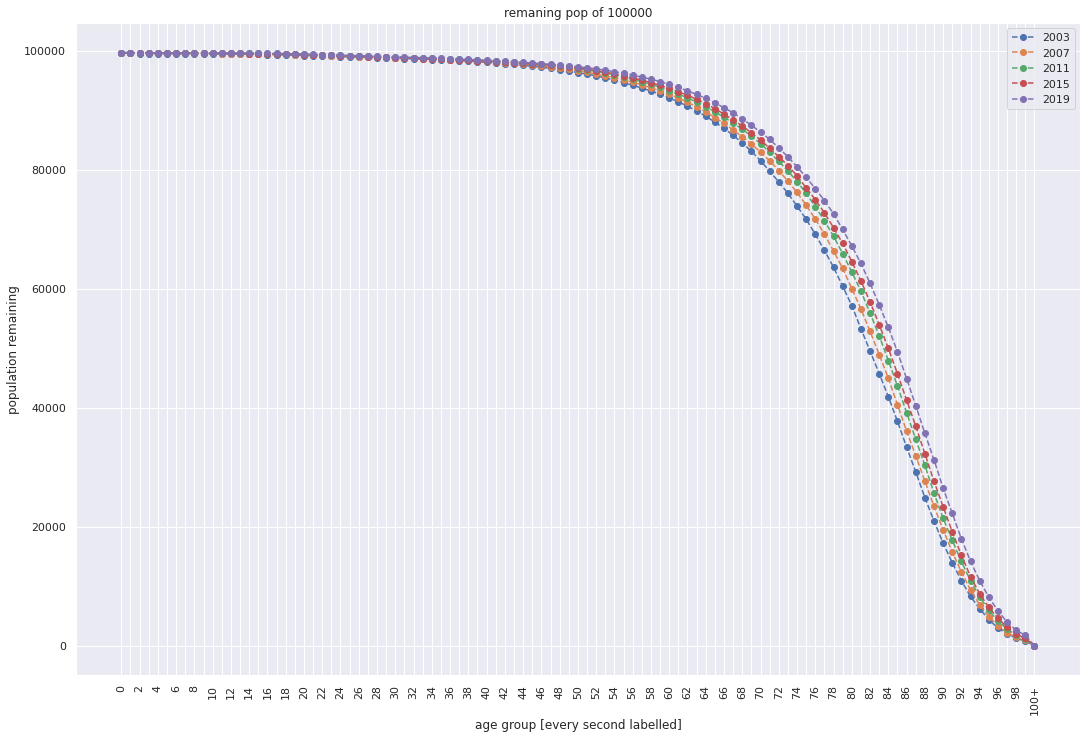

In [123]:
plt.figure(figsize=(18,12))

for y in pop_evolution.index.get_level_values(0)[::len(age_labels)][1::4]:
    plt.plot(pop_evolution.loc[y,'remaining'],'o--',label=y)
    
ax = plt.gca()

plt.title('remaning pop of 100000')
plt.xticks(rotation=90)

for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
    
plt.xlabel('age group [every second labelled]')
plt.ylabel('population remaining')
    
plt.legend(loc='upper right')

In [124]:
pop_df_inc_2020

pop
year age        
2002 0     82336
     1     92580
     2     92138
     3     90251
     4     91214
...          ...
2020 96     5709
     97     3972
     98     2707
     99     1915
     100+   2715

[1919 rows x 1 columns]

In [125]:
age_bins = [-1,64,79,89,200]

def coarsify(df):
    
    num_age = [int(x.replace('+','')) for x in df.index.get_level_values(1).values]
    df['num_age'] = num_age
    df['age_bin'] = pd.cut(df['num_age'],age_bins,labels=['0-64','65-79','80-89','90+'])
    return df

In [126]:
coarse_pop = coarsify(pop_df_inc_2020).groupby(['year','age_bin'])['pop'].sum()
coarse_pop

year  age_bin
2002  0-64       7391436
      65-79      1068690
      80-89       407646
      90+          71595
2003  0-64       7418748
                  ...   
2019  90+         103476
2020  0-64       8273794
      65-79      1549655
      80-89       451009
      90+         104025
Name: pop, Length: 76, dtype: int64

In [127]:
coarse_dead = coarsify(dead_df).groupby(['year','age_bin'])['dead'].sum()
coarse_dead

year  age_bin
2002  0-64       13119
      65-79      26997
      80-89      37509
      90+        17384
2003  0-64       13094
                 ...  
2018  90+        22667
2019  0-64       10139
      65-79      26279
      80-89      30594
      90+        21754
Name: dead, Length: 72, dtype: int64

In [128]:
multi_idx = pd.MultiIndex.from_arrays([['2020'] * 4,['0-64','65-79','80-89','90+']])
multi_idx

MultiIndex([('2020',  '0-64'),
            ('2020', '65-79'),
            ('2020', '80-89'),
            ('2020',   '90+')],
           )

In [129]:
dead_2020_s = pd.Series(dead_2020.sum(),name='dead')
dead_2020_s.index = multi_idx
dead_2020_s

2020  0-64     10359.919137
      65-79    28569.762803
      80-89    34278.280323
      90+      24069.474394
Name: dead, dtype: float64

In [130]:
coarse_dead = pd.concat([coarse_dead,dead_2020_s])
coarse_dead

year  age_bin
2002  0-64       13119.000000
      65-79      26997.000000
      80-89      37509.000000
      90+        17384.000000
2003  0-64       13094.000000
                     ...     
2019  90+        21754.000000
2020  0-64       10359.919137
      65-79      28569.762803
      80-89      34278.280323
      90+        24069.474394
Name: dead, Length: 76, dtype: float64

In [131]:
coarse_mort = coarse_dead / coarse_pop
coarse_mort

year  age_bin
2002  0-64       0.001775
      65-79      0.025262
      80-89      0.092014
      90+        0.242810
2003  0-64       0.001765
                   ...   
2019  90+        0.210232
2020  0-64       0.001252
      65-79      0.018436
      80-89      0.076004
      90+        0.231382
Length: 76, dtype: float64

In [132]:
coarse_mort.loc['2015']

age_bin
0-64     0.001393
65-79    0.017732
80-89    0.078093
90+      0.221373
dtype: float64

/usr/local/lib64/python3.8/site-packages/matplotlib/axes/_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


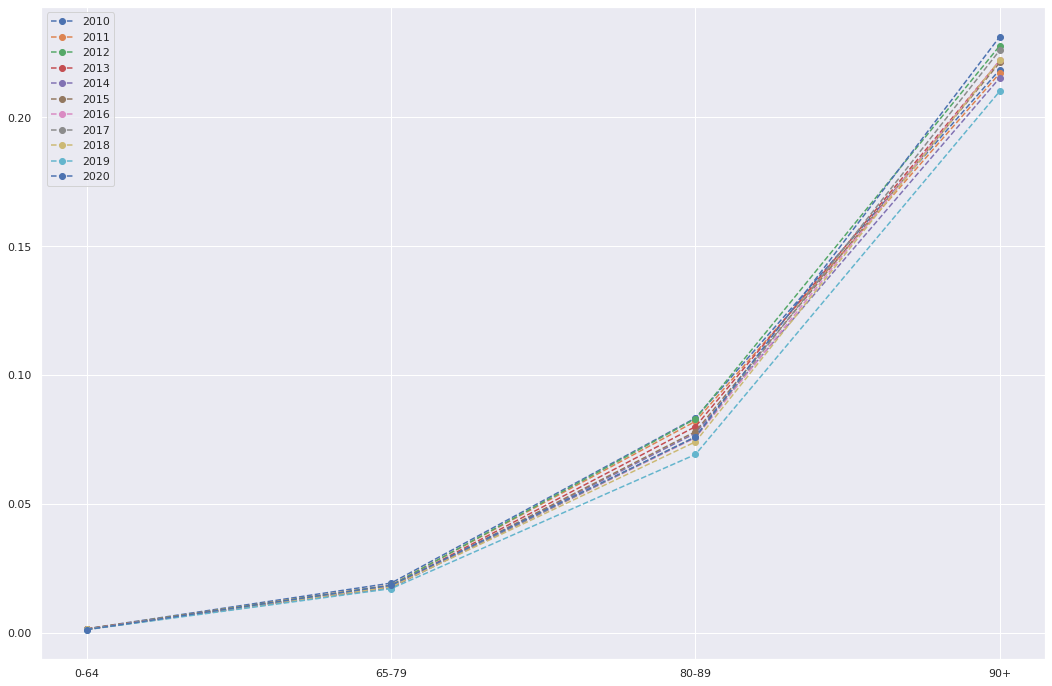

In [133]:
plt.figure(figsize=(18,12))

for i,y in enumerate(coarse_mort.index.get_level_values(0)[::len(age_bins) - 1][8:]):
    plt.plot(coarse_mort.loc[y],'o--',label=y)
    
plt.legend(loc='upper left')


In [134]:
coarse_mort_flat = coarse_mort.unstack()
coarse_mort_flat

age_bin,0-64,65-79,80-89,90+
year,,,,
2002,0.001775,0.025262,0.092014,0.242810
2003,0.001765,0.024400,0.089277,0.231547
2004,0.001755,0.023107,0.085865,0.222825
2005,0.001756,0.022879,0.086357,0.229101
2006,0.001738,0.021950,0.085737,0.228341
2007,0.001714,0.021194,0.086511,0.232604
2008,0.001694,0.020333,0.085905,0.232355
2009,0.001649,0.019541,0.084310,0.223789
2010,0.001589,0.019294,0.083360,0.218603


In [135]:
coarse_intervals = pd.Series([64,14,9,1],index=coarse_mort_flat.columns)

coarse_proportion_of_pop_dead_in_interval = ( 1 -  ( 1 - coarse_mort_flat ) ** coarse_intervals) # one year intervals
coarse_proportion_of_pop_dead_in_interval['90+'] = 1
coarse_proportion_of_pop_dead_in_interval

age_bin,0-64,65-79,80-89,90+
year,,,,
2002,0.107469,0.301073,0.580518,1
2003,0.106902,0.292375,0.569000,1
2004,0.106351,0.279133,0.554250,1
2005,0.106391,0.276766,0.556404,1
2006,0.105358,0.267080,0.553688,1
2007,0.103976,0.259113,0.557077,1
2008,0.102813,0.249930,0.554424,1
2009,0.100225,0.241398,0.547377,1
2010,0.096766,0.238716,0.543135,1


In [136]:
pop_evolution_coarse = pd.DataFrame()

for year in coarse_proportion_of_pop_dead_in_interval.index:
    
    tmp = pd.DataFrame(dead_and_remaining(year,coarse_proportion_of_pop_dead_in_interval)).T
    tmp.columns = ['dead','remaining']
    tmp['year'] = year
    pop_evolution_coarse = pd.concat([pop_evolution_coarse,tmp])
    
pop_evolution_coarse['interval'] = np.tile(['0-64','65-79','80-89','90+'],
                                      len(coarse_proportion_of_pop_dead_in_interval))

pop_evolution_coarse = pop_evolution_coarse.set_index(['year','interval'])
pop_evolution_coarse

dead     remaining
year interval                            
2002 0-64      10746.898011  89253.101989
     65-79     26871.672655  62381.429334
     80-89     36213.511923  26167.917411
     90+       26167.917411      0.000000
2003 0-64      10690.205652  89309.794348
...                     ...           ...
2019 90+       38045.048514      0.000000
2020 0-64       7705.621084  92294.378916
     65-79     21167.350610  71127.028307
     80-89     36207.575245  34919.453062
     90+       34919.453062      0.000000

[76 rows x 2 columns]

In [137]:
start_year = '2015'
start_year_idx = (pop_evolution_coarse.index.get_level_values(0)[::len(age_bins) - 1] == start_year).argmax()
start_year_idx

13

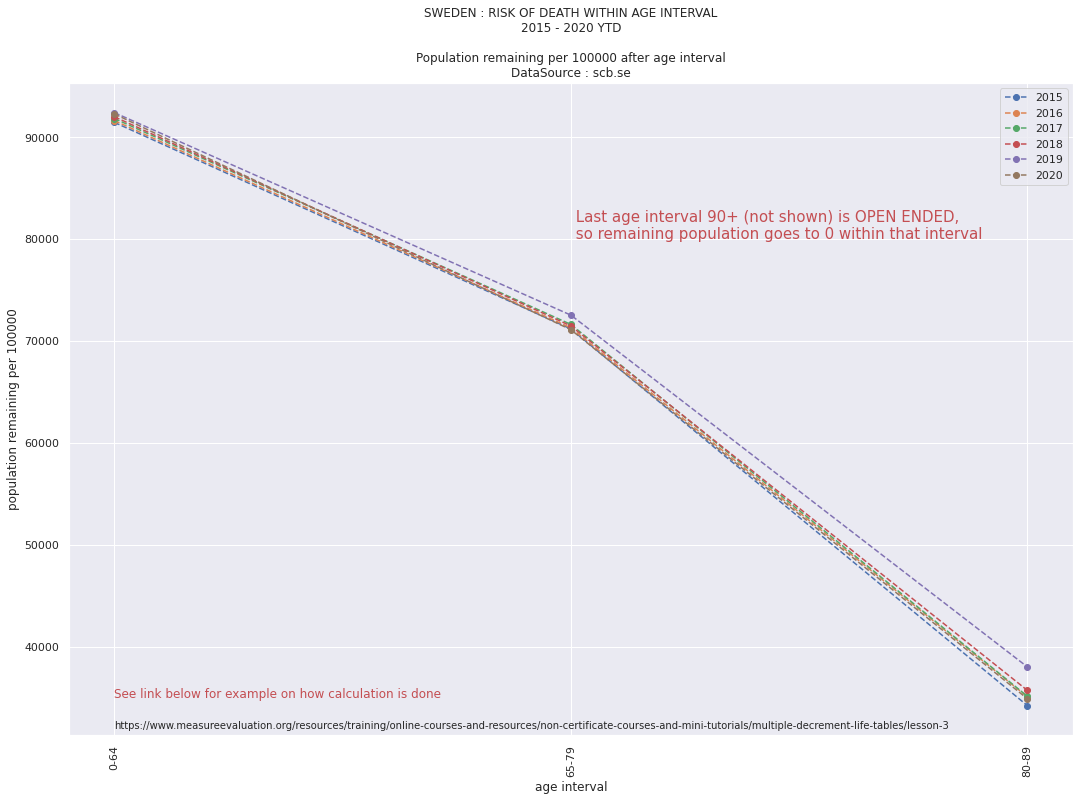

In [138]:
plt.figure(figsize=(18,12))

for y in pop_evolution_coarse.index.get_level_values(0)[::len(age_bins) -1 ][start_year_idx:]:
    plt.plot(pop_evolution_coarse.loc[y,'remaining'][:-1],'o--',label=y)
    
ax = plt.gca()

title1 = 'SWEDEN : risk of death within age interval\n{} - 2020 YTD\n'.format(start_year).upper()
title2 = '\nPopulation remaining per 100000 after age interval'
title3 = '\nDataSource : scb.se'

plt.title(title1 + title2 + title3)

plt.text('0-64',35000,'See link below for example on how calculation is done',color='r')
plt.text('0-64',32000,'https://www.measureevaluation.org/resources/training/online-courses-and-resources/non-certificate-courses-and-mini-tutorials/multiple-decrement-life-tables/lesson-3',
        size=10)

plt.text('65-79',80000,' Last age interval 90+ (not shown) is OPEN ENDED,\n so remaining population goes to 0 within that interval',
        color='r',size=15)

plt.xticks(rotation=90)

'''
for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
'''

plt.xlabel('age interval')
plt.ylabel('population remaining per 100000')
    
plt.legend(loc='upper right')
plt.savefig('swe_LE_remaining_population.jpg',format='jpg')

In [139]:
#### age adjusted deaths #####

standard_population = coarse_pop.loc['2019']
standard_population

age_bin
0-64     8240587
65-79    1533437
80-89     441973
90+       103476
Name: pop, dtype: int64

In [140]:
stratified_coarse_abs_deaths = standard_population * coarse_mort_flat
stratified_coarse_abs_deaths

age_bin,0-64,65-79,80-89,90+
year,,,,
2002,14626.151245,38737.331395,40667.552869,25125.033648
2003,14544.535841,37416.393265,39457.963821,23959.543492
2004,14465.285520,35433.866142,37950.140945,23057.085480
2005,14470.983496,35082.986608,38167.581471,23706.480237
2006,14322.471143,33658.524219,37893.602585,23627.840457
2007,14124.072045,32499.782621,38235.699028,24068.924035
2008,13957.360551,31178.678476,37967.749137,24043.196309
2009,13587.100968,29964.429615,37262.717790,23156.764432
2010,13093.911387,29585.376282,36843.000292,22620.135541


In [141]:
age_adj_mortality = stratified_coarse_abs_deaths.sum(axis=1) / standard_population.sum()
age_adj_mortality

year
2002    0.011547
2003    0.011181
2004    0.010747
2005    0.010798
2006    0.010611
2007    0.010556
2008    0.010383
2009    0.010075
2010    0.009898
2011    0.009665
2012    0.009765
2013    0.009492
2014    0.009218
2015    0.009312
2016    0.009198
2017    0.009198
2018    0.009095
2019    0.008602
2020    0.009315
dtype: float64

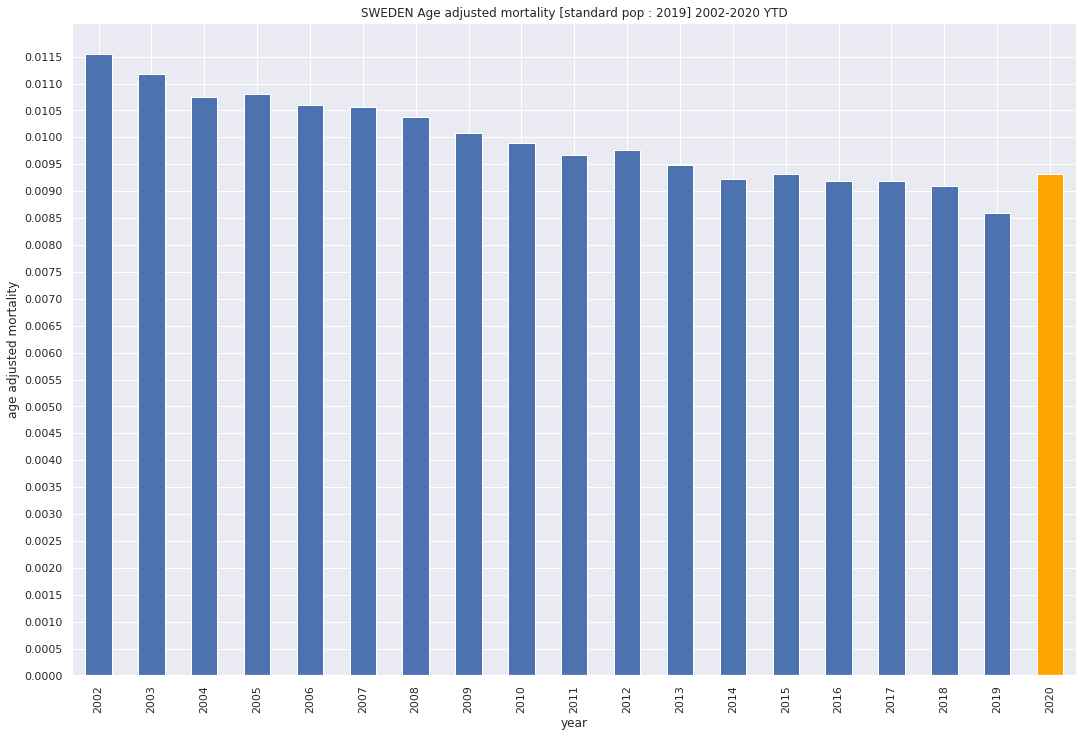

In [142]:
colors = ['b'] * 18 + ['orange']
title = 'SWEDEN Age adjusted mortality [standard pop : 2019] 2002-2020 YTD'
age_adj_mortality.plot(kind='bar',figsize=(18,12),color=colors,title=title)
plt.ylabel('age adjusted mortality')
plt.yticks(np.arange(0,0.012,0.0005))
plt.savefig('swe_age_adjusted_mortality_2020_final_based_week_nrs.jpg',format='jpg')

In [146]:
print (dead_2020_s.sum())
dead_2020_s.sum() - 97164

97277.43665768193


113.43665768193023